# Regression and Prediction

## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#lung dataset
lung = pd.read_csv(r"F:\DataScience\Statistics\data\LungDisease.csv")

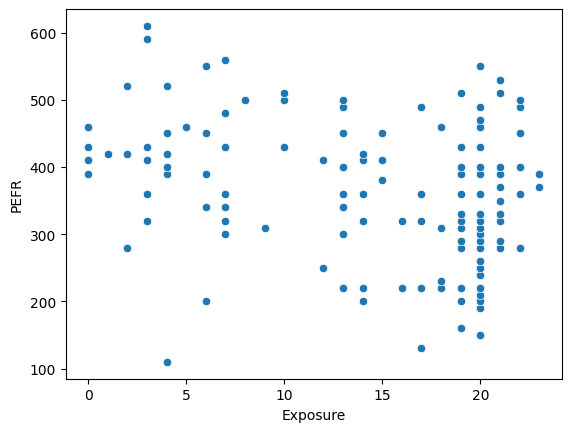

In [3]:
ax = sns.scatterplot(data=lung, y="PEFR", x="Exposure")

In [4]:
#Lets apply a linear regression 
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()

model.fit(lung[predictors], lung[outcome])


LinearRegression()

In [5]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: 424.582806573957
Slope: [-4.18457649]


In [6]:
x = np.arange(0, 25)
y = model.intercept_ + model.coef_[0]*x

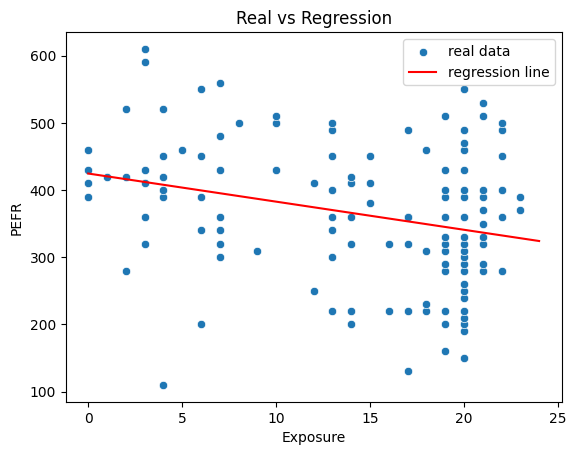

In [7]:
ax = sns.scatterplot(data=lung, y="PEFR", x="Exposure", label='real data')
sns.lineplot(x=x, y=y, ax = ax , color='red', label='regression line')
plt.title('Real vs Regression')
#plt.xlim(0,25)
#plt.ylim(100, 450)
plt.show()

## Residuals

In [8]:
residuals = model.predict(lung[predictors])-lung[outcome]
residuals

0       34.582807
1       14.582807
2       -5.417193
3      -35.417193
4        0.398230
          ...    
117   -117.477876
118   -157.477876
119   -167.477876
120    -41.662453
121    -61.662453
Name: PEFR, Length: 122, dtype: float64

## Multiple Linear Regression

In [9]:
#king county housing data
house = pd.read_csv(r"F:\DataScience\Statistics\data\house_sales.csv", sep="\t")

In [10]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [11]:
#vamos a hacer una regresion multiple , se usa la misma libreria.
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

model  = LinearRegression()

model.fit(house[predictors], house[outcome])

LinearRegression()

In [12]:
print(f'Intercept: {model.intercept_}')
print('Coefficients: ')
for name, coef in zip(predictors, model.coef_):
    print(f'{name}: {coef}')


Intercept: -521871.3681882861
Coefficients: 
SqFtTotLiving: 228.83060360240754
SqFtLot: -0.06046682065306008
Bathrooms: -19442.840398321146
Bedrooms: -47769.955185214094
BldgGrade: 106106.9630789811


## Model Assessing

![Regression Metrics](images/1_5fnmYVHLTC8mGxybHm4XkA.png)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
fitted = model.predict(house[predictors])

In [15]:
#MSE
mse = mean_squared_error(house[outcome], fitted)
mse 
# How to interpret this result  ??  ??

68235991549.00575

In [16]:
#RMSE
rmse = np.sqrt(mse)
rmse

np.float64(261220.19743696266)

In [17]:
#R2 
r2 = r2_score(house[outcome], fitted)
r2

0.5405875253381902

In [18]:
# another option for R2 , coeficiente de determinación.
model.score(house[predictors], house[outcome])

0.5405875253381902

In [19]:
#MAE
mean_absolute_error(house[outcome], fitted)

150660.91414606493

## Cross Validation

Proccess: 
1. Set aside 1/k of the data as a holdout sample.
2. Train the model on the remaining data
3. Apply (score) the model to the 1/k holdout, and record needed model assessment metrics.
4. Restore the first 1/k of tthe data, and set aside the next 1/k (Excluding any records that got picked the first time)
5. Repeat steps 2 and 3.
6. Repeat until each record has been used in the holdout portion.
7. Average or otherwise combinme the model assesment metrics.

In [20]:
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits = 5, shuffle=True) # definimos la cantidad de splits que hara el KFold , shuffle = True aleatoriza la data
#podemos usar random_state para reproducibilidad.

In [22]:
kf.get_n_splits()  # esto solo sirve para corroborar la cantidad de splits que hará.

5

In [23]:
index_tuple = tuple(kf.split(house[predictors])) # aqui podemos ver que lo que retorna la funcion KFOLD son indices.
index_tuple

((array([    0,     1,     2, ..., 22683, 22684, 22686], shape=(18149,)),
  array([    3,    15,    22, ..., 22680, 22681, 22685], shape=(4538,))),
 (array([    0,     1,     3, ..., 22683, 22685, 22686], shape=(18149,)),
  array([    2,    19,    27, ..., 22664, 22671, 22684], shape=(4538,))),
 (array([    0,     1,     2, ..., 22682, 22684, 22685], shape=(18150,)),
  array([    6,     8,    11, ..., 22679, 22683, 22686], shape=(4537,))),
 (array([    1,     2,     3, ..., 22684, 22685, 22686], shape=(18150,)),
  array([    0,     5,     9, ..., 22668, 22677, 22678], shape=(4537,))),
 (array([    0,     2,     3, ..., 22684, 22685, 22686], shape=(18150,)),
  array([    1,     4,     7, ..., 22672, 22676, 22682], shape=(4537,))))

In [24]:
score_list = []

for (train_index, test_index) in kf.split(house[predictors]):
    train_set = house.iloc[train_index]
    test_set = house.iloc[test_index]
    lm = LinearRegression()
    lm.fit(train_set[predictors], train_set[outcome])
    r2 = r2_score(test_set[outcome], lm.predict(test_set[predictors]))
    score_list.append(r2)

score_np_array = np.array(score_list)

print('Scores de cada Fold: ')
print(score_np_array)
print(f'Score medio : {score_np_array.mean()}')

Scores de cada Fold: 
[0.52480682 0.57217471 0.5529177  0.54359316 0.50544725]
Score medio : 0.5397879263079907


## Interactions and Main Effects

Cuando usamos regresion lineal convencional , asumimos que cada predictor tiene una relacion directa con el resultado, y omitimos relaciones entre predictores.
Esto en la realidad no es siempre cierto. 

- Main effects: Variables predictoras
- Interactions: Interacciones entre los main effects o variables predictoras. 

In [27]:
# Como simulamos interacciones? 
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [34]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType' ]
house_Y = house[['AdjSalePrice']]
house_X = pd.get_dummies(house[predictors], drop_first = True)

In [38]:
interaction_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [46]:
House_X_interactions = interaction_transformer.fit_transform(house_X)
House_X_interactions = pd.DataFrame(data=House_X_interactions, columns = interaction_transformer.get_feature_names_out(), index= house_X.index)

In [47]:
House_X_interactions

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,PropertyType_Single Family,PropertyType_Townhouse,SqFtTotLiving SqFtLot,SqFtTotLiving Bathrooms,SqFtTotLiving Bedrooms,...,Bathrooms Bedrooms,Bathrooms BldgGrade,Bathrooms PropertyType_Single Family,Bathrooms PropertyType_Townhouse,Bedrooms BldgGrade,Bedrooms PropertyType_Single Family,Bedrooms PropertyType_Townhouse,BldgGrade PropertyType_Single Family,BldgGrade PropertyType_Townhouse,PropertyType_Single Family PropertyType_Townhouse
1,2400.0,9373.0,3.00,6.0,7.0,0.0,0.0,22495200.0,7200.0,14400.0,...,18.00,21.00,0.00,0.0,42.0,0.0,0.0,0.0,0.0,0.0
2,3764.0,20156.0,3.75,4.0,10.0,1.0,0.0,75867184.0,14115.0,15056.0,...,15.00,37.50,3.75,0.0,40.0,4.0,0.0,10.0,0.0,0.0
3,2060.0,26036.0,1.75,4.0,8.0,1.0,0.0,53634160.0,3605.0,8240.0,...,7.00,14.00,1.75,0.0,32.0,4.0,0.0,8.0,0.0,0.0
4,3200.0,8618.0,3.75,5.0,7.0,1.0,0.0,27577600.0,12000.0,16000.0,...,18.75,26.25,3.75,0.0,35.0,5.0,0.0,7.0,0.0,0.0
5,1720.0,8620.0,1.75,4.0,7.0,1.0,0.0,14826400.0,3010.0,6880.0,...,7.00,12.25,1.75,0.0,28.0,4.0,0.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,1480.0,5468.0,1.75,3.0,7.0,1.0,0.0,8092640.0,2590.0,4440.0,...,5.25,12.25,1.75,0.0,21.0,3.0,0.0,7.0,0.0,0.0
27058,4720.0,23914.0,4.50,4.0,11.0,1.0,0.0,112874080.0,21240.0,18880.0,...,18.00,49.50,4.50,0.0,44.0,4.0,0.0,11.0,0.0,0.0
27061,1070.0,11170.0,1.00,4.0,6.0,1.0,0.0,11951900.0,1070.0,4280.0,...,4.00,6.00,1.00,0.0,24.0,4.0,0.0,6.0,0.0,0.0
27062,1345.0,6223.0,2.00,3.0,7.0,1.0,0.0,8369935.0,2690.0,4035.0,...,6.00,14.00,2.00,0.0,21.0,3.0,0.0,7.0,0.0,0.0


In [41]:
linear_model = LinearRegression()

In [48]:
linear_model.fit(House_X_interactions, house_Y)

LinearRegression()

In [49]:
linear_model.coef_

array([[-4.13237573e+02, -3.08798616e+00, -4.88691811e+04,
         7.61067537e+04,  9.62921207e+03,  1.16897076e+05,
        -1.53948039e+05, -3.48777333e-04,  2.75313076e+01,
         6.45823008e+00,  5.24809724e+01,  4.76904258e+01,
         6.03541181e+01, -2.21725067e-01,  4.41721741e-01,
         2.46191983e-02,  2.79177479e+00, -1.04736244e+01,
        -1.99876525e+04,  1.36656404e+04, -3.35313136e+04,
        -2.00578677e+04, -7.06483490e+03, -1.51576569e+04,
        -6.68580087e+03, -2.65127369e+04, -8.39448141e+02,
         0.00000000e+00]])

In [50]:
linear_model.feature_names_in_

array(['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
       'PropertyType_Single Family', 'PropertyType_Townhouse',
       'SqFtTotLiving SqFtLot', 'SqFtTotLiving Bathrooms',
       'SqFtTotLiving Bedrooms', 'SqFtTotLiving BldgGrade',
       'SqFtTotLiving PropertyType_Single Family',
       'SqFtTotLiving PropertyType_Townhouse', 'SqFtLot Bathrooms',
       'SqFtLot Bedrooms', 'SqFtLot BldgGrade',
       'SqFtLot PropertyType_Single Family',
       'SqFtLot PropertyType_Townhouse', 'Bathrooms Bedrooms',
       'Bathrooms BldgGrade', 'Bathrooms PropertyType_Single Family',
       'Bathrooms PropertyType_Townhouse', 'Bedrooms BldgGrade',
       'Bedrooms PropertyType_Single Family',
       'Bedrooms PropertyType_Townhouse',
       'BldgGrade PropertyType_Single Family',
       'BldgGrade PropertyType_Townhouse',
       'PropertyType_Single Family PropertyType_Townhouse'], dtype=object)

## Regression Diagnostics

### Outliers

Key concepts: 
- Standardized Residuals
- Standar Error

![alt text](image.png)

In [52]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [53]:
# Fitting a model to predict prices in ZIP code 98105.
house_98105 = house[house['ZipCode'] == 98105]
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade' ]
outcome = 'AdjSalePrice'

In [54]:
lm_98105 = LinearRegression()

In [56]:
lm_98105.fit(house_98105[predictors], house_98105[outcome])

LinearRegression()

In [59]:
predictions = lm_98105.predict(house_98105[predictors])

In [58]:
def standard_error(y_true, y_pred, p):
    residuals = y_true - y_pred
    n = len(y_true)
    se = np.sqrt(np.sum(residuals**2) / (n - p - 1))
    return se

In [61]:
std_error = standard_error(house_98105[outcome], predictions, len(predictors))
std_error

np.float64(178494.39694565051)

In [62]:
standardized_residuals = (house_98105[outcome] - predictions ) / std_error

In [64]:
standardized_residuals.sort_values()

24333   -4.245252
26041   -3.798565
24331   -2.589381
1036    -2.555051
26040   -2.299895
           ...   
14395    2.693789
26043    3.413994
14394    4.510207
14384    4.633139
14392    5.344205
Name: AdjSalePrice, Length: 313, dtype: float64

In [67]:
residuals[24333]

np.float64(757753.6192115953)

In [68]:
residuals[14392]

np.float64(-953910.5988085682)

In [70]:
house.loc[14392]

DocumentDate          2011-08-01
SalePrice                1650000
PropertyID            4219400785
PropertyType       Single Family
ym                    2011-08-01
zhvi_px                   312700
zhvi_idx                 0.71852
AdjSalePrice           2296386.0
NbrLivingUnits                 1
SqFtLot                     7200
SqFtTotLiving               3630
SqFtFinBasement              960
Bathrooms                    4.0
Bedrooms                       4
BldgGrade                      9
YrBuilt                     1936
YrRenovated                    0
TrafficNoise                   0
LandVal                   467000
ImpsVal                  1112000
ZipCode                    98105
NewConstruction            False
Name: 14392, dtype: object